# Assignment 2 - Leonardo Stoppani
### Plot the auto-correlogram of the temperature data in the appliances [dataset](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#).

## Get Data
First temperatures data of the 9 sensors are extracted. Every sensor is placed in a specific room of the house.

In [1]:
# import the dataset 
import pandas as pd

#download data from gdrive (use for colab notebook)
#url = "https://drive.google.com/uc?id=1iDSkzcs4fmyKFsOGtv9XPev7ieNfwI52"
#output = 'energydata_complete.csv'
#gdown.download(url, output, quiet=False)

df = pd.read_csv(r'./energydata_complete.csv', parse_dates=['date'], index_col='date')

# define dict for sensors name 
sensors = {1:"Kitchen", 2:"Living", 3:"Laundry", 4:"Office", 5:"Bathroom", 
           6:"Outside North", 7:"Ironing", 8:"Teenager", 9:"Parents",}

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

## Plot Data
Temperatures have been measured for 4.5 months, from 2016-01-11 to 2016-05-27 with 10 minutes interval. It's useful to plot the 9 time series for a first look to data. From the plots it's clear data have a lot of noise, so before plotting the auto-correlogram we try to reduce it. Also plots show a positive trend as temperature values are increasing in time.

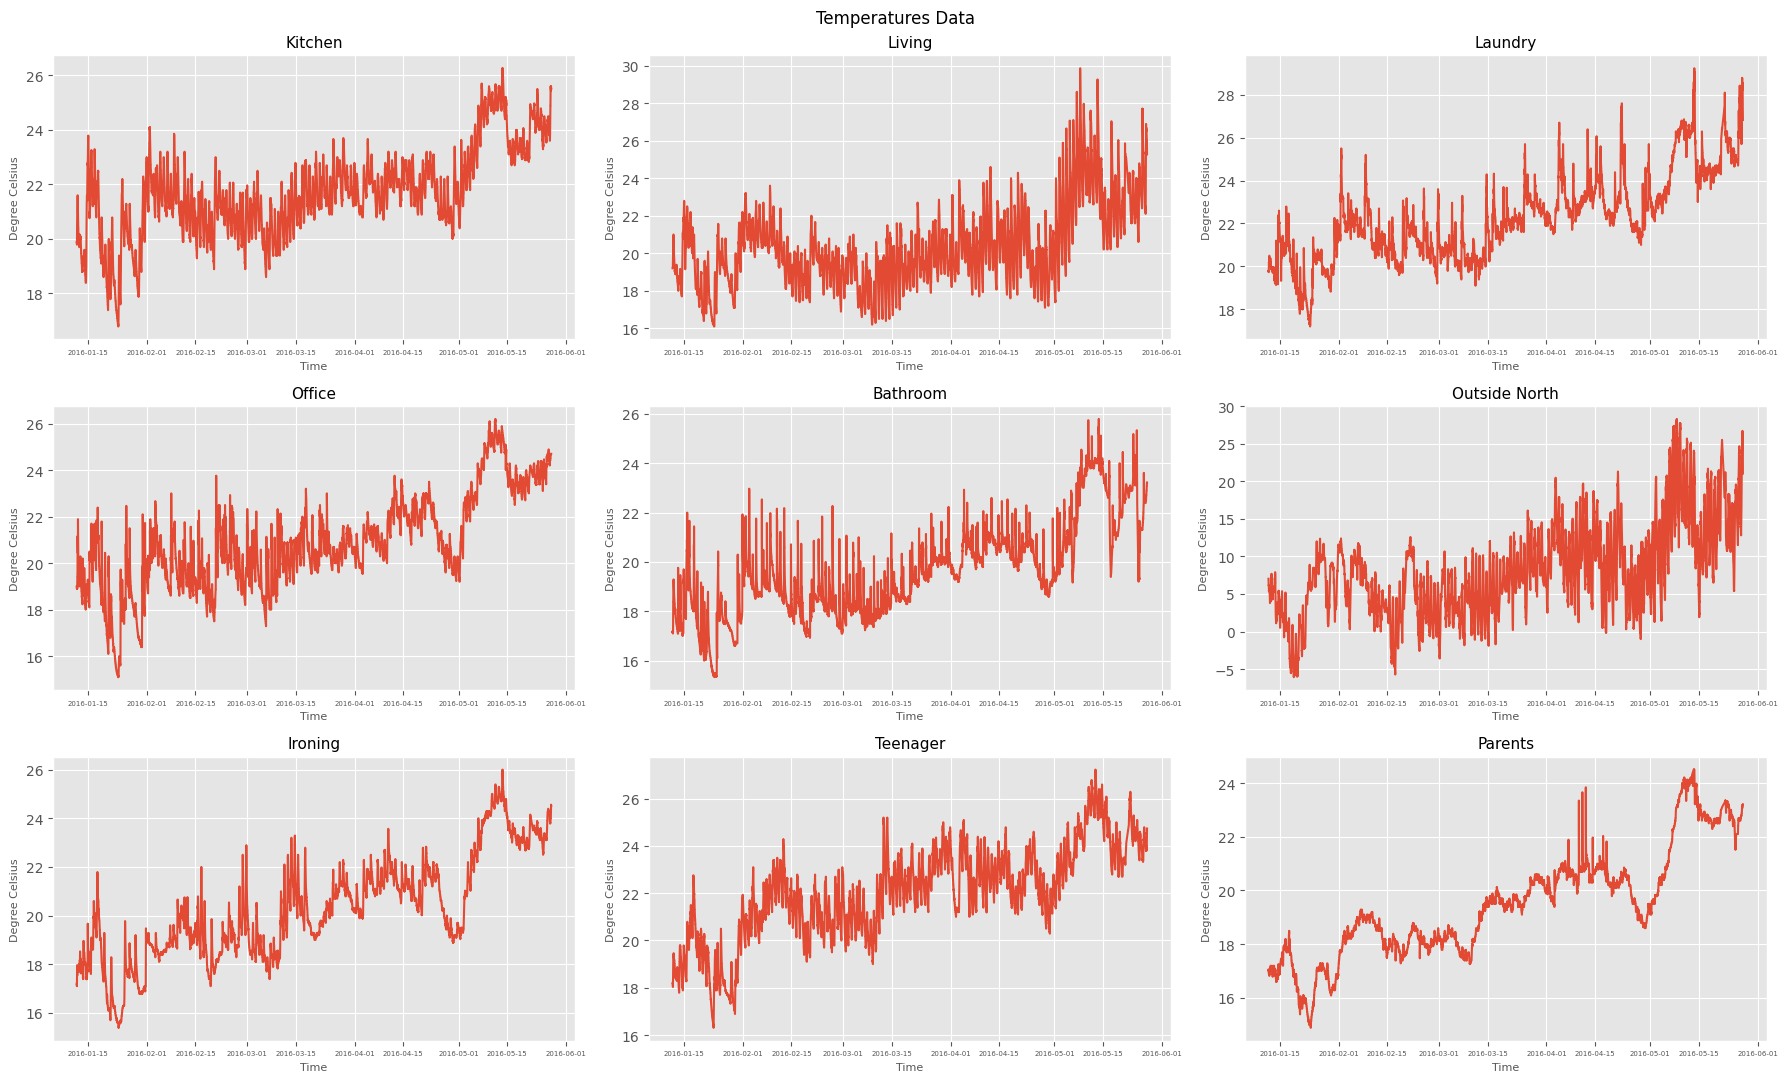

In [2]:
# plot data to understand best lag value (k)
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import numpy as np

plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df['T'+str(k)]
        #print(data)
        result = axis[i,j].plot(data)
        axis[i,j].set_title(sensors[k], fontsize=11)
        axis[i,j].set_xlabel("Time", fontsize=8)
        axis[i,j].set_ylabel("Degree Celsius", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 

figure.suptitle("Temperatures Data")
figure.tight_layout()
plt.show()


## Clean Data

### Subsampling
Noise in the data can be caused by the fine grain measurement. Temperature is affected by small variation wich can make difficult to read data, so a subsampling can be made by moving from 10 minutes intervals to 1 hour and taking the avarege value. This operation can be made without losing too much information and reducing more the noise.

In [3]:
# subsampling 6 row into 1 and take average temperature every hour
df_sub = df.resample('60T').mean() # one line every hour
#print(df_sub.head())
print(df_sub.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3290 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Freq: 60T
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   3290 non-null   float64
 1   lights       3290 non-null   float64
 2   T1           3290 non-null   float64
 3   RH_1         3290 non-null   float64
 4   T2           3290 non-null   float64
 5   RH_2         3290 non-null   float64
 6   T3           3290 non-null   float64
 7   RH_3         3290 non-null   float64
 8   T4           3290 non-null   float64
 9   RH_4         3290 non-null   float64
 10  T5           3290 non-null   float64
 11  RH_5         3290 non-null   float64
 12  T6           3290 non-null   float64
 13  RH_6         3290 non-null   float64
 14  T7           3290 non-null   float64
 15  RH_7         3290 non-null   float64
 16  T8           3290 non-null   float64
 17  RH_8         3290 non-null   float64
 18  T9

### Remove Trend
All the time series have a linear trend from lower to higher temperatures, caused by the transition from winter to summer. Before to perform DFT and to study data periodicity, trends need to be removed.

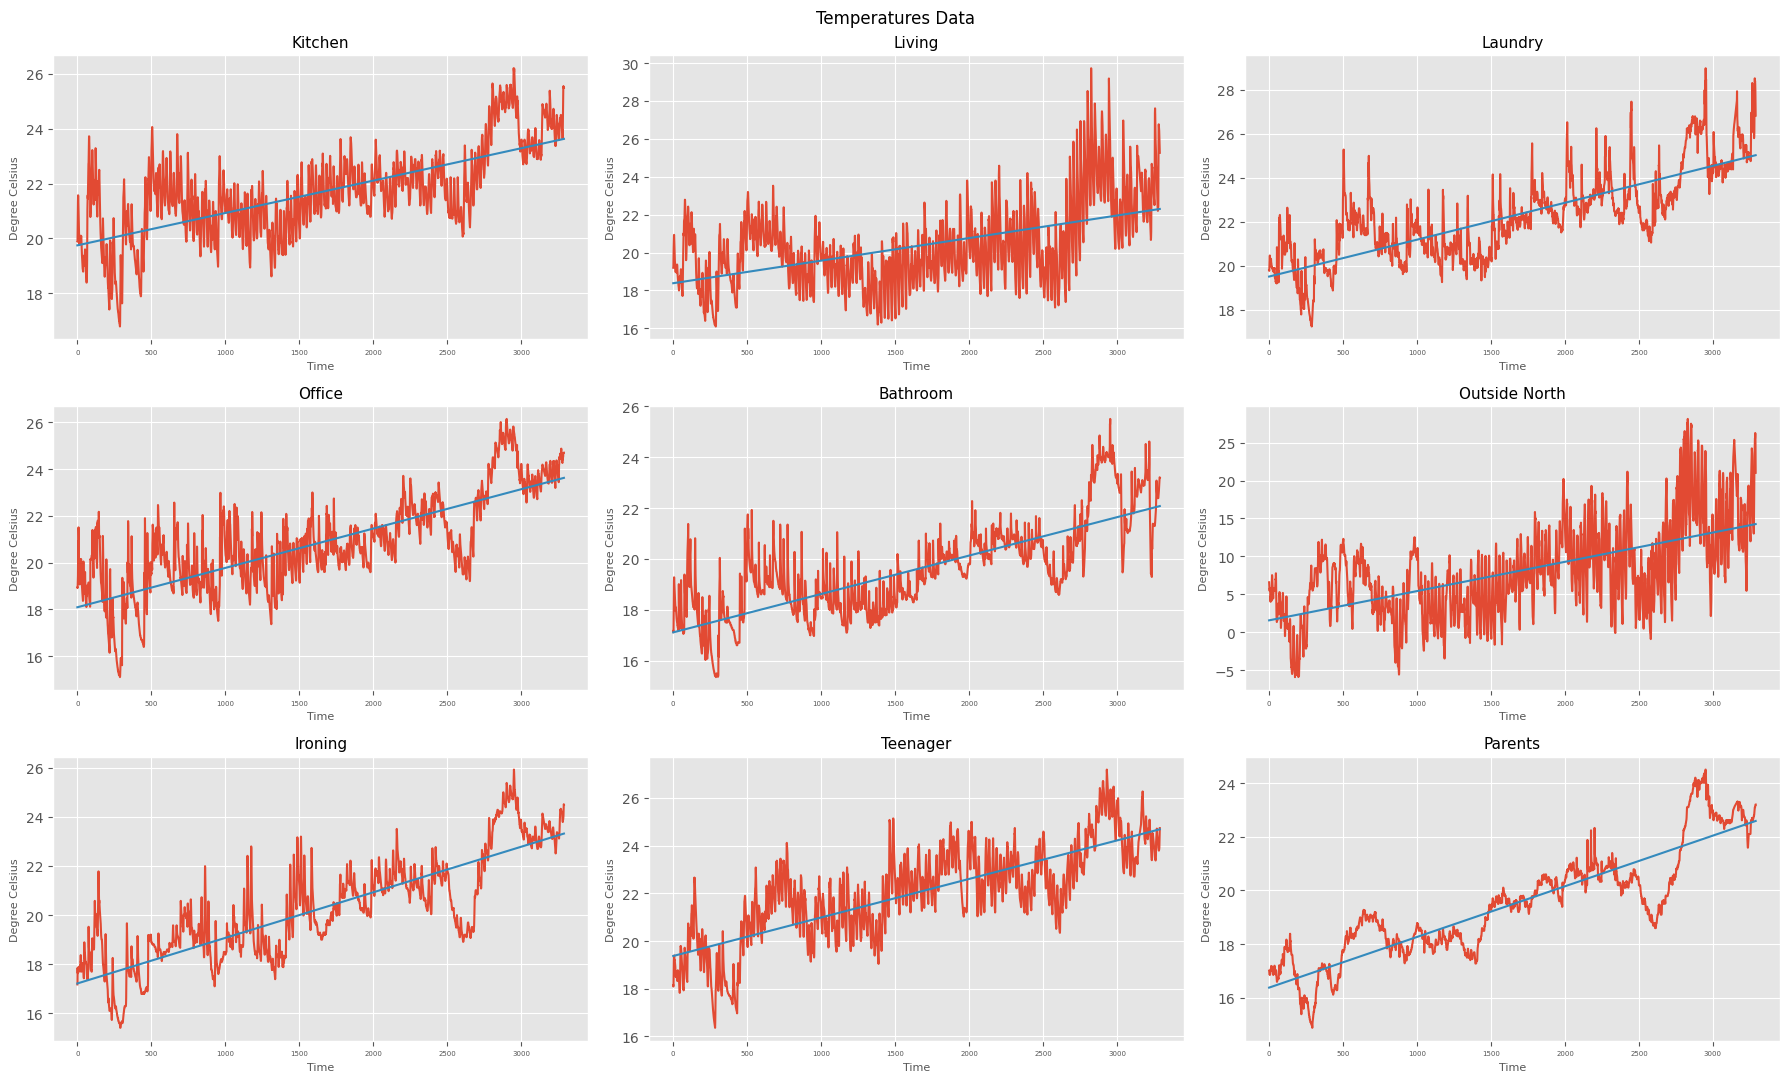

In [4]:
#remove trend
from sklearn.linear_model import LinearRegression

plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df_sub['T'+str(k)]

        #linear trend
        model = LinearRegression()

        X = np.arange(len(data.index))
        X = np.reshape(X, (len(X),1))
        y = data.values

        model.fit(X,y)
        trend = model.predict(X)

        axis[i,j].plot(y)
        axis[i,j].plot(trend)

        axis[i,j].set_title(sensors[k], fontsize=11)
        axis[i,j].set_xlabel("Time", fontsize=8)
        axis[i,j].set_ylabel("Degree Celsius", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 
        

figure.suptitle("Temperatures Data")
figure.tight_layout()
plt.show()

A linear regression seems to fit the trend, now we remove it.

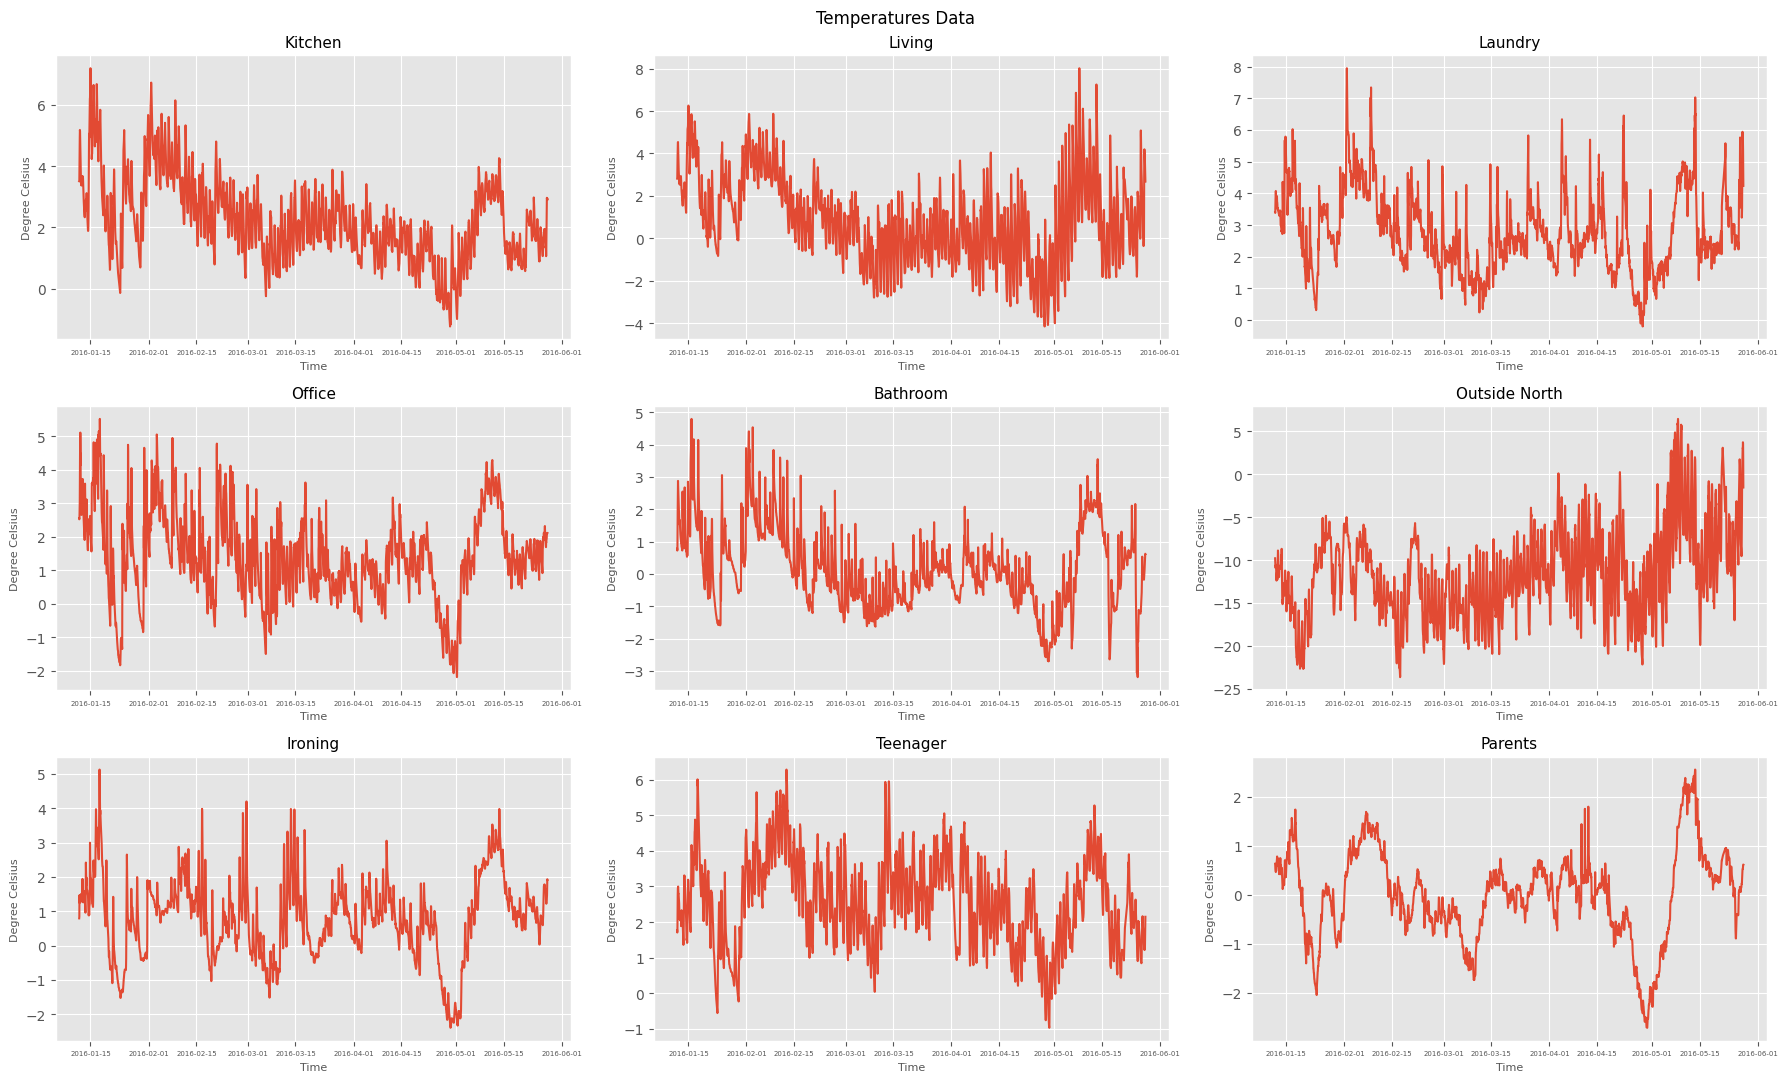

In [5]:
plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
for i in range(3):
    for j in range(3):
        k+=1

        #remove linear trend
        df_sub['T'+str(k)] = [df_sub['T'+str(k)][i] - trend[i] for i in range(0, len(df_sub['T'+str(k)]))]

        #axis[i,j].plot(y)
        axis[i,j].plot(df_sub['T'+str(k)])

        axis[i,j].set_title(sensors[k], fontsize=11)
        axis[i,j].set_xlabel("Time", fontsize=8)
        axis[i,j].set_ylabel("Degree Celsius", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 
        

figure.suptitle("Temperatures Data")
figure.tight_layout()
plt.show()

### Discrete Fourier Transform (DFT)
By transforming time series from time domain into the frequency domain, frequency which are causing noise can be detected and discarded. In this way when data are tranformed back into the time domain noise is reduced and relevant frequency are more visible.

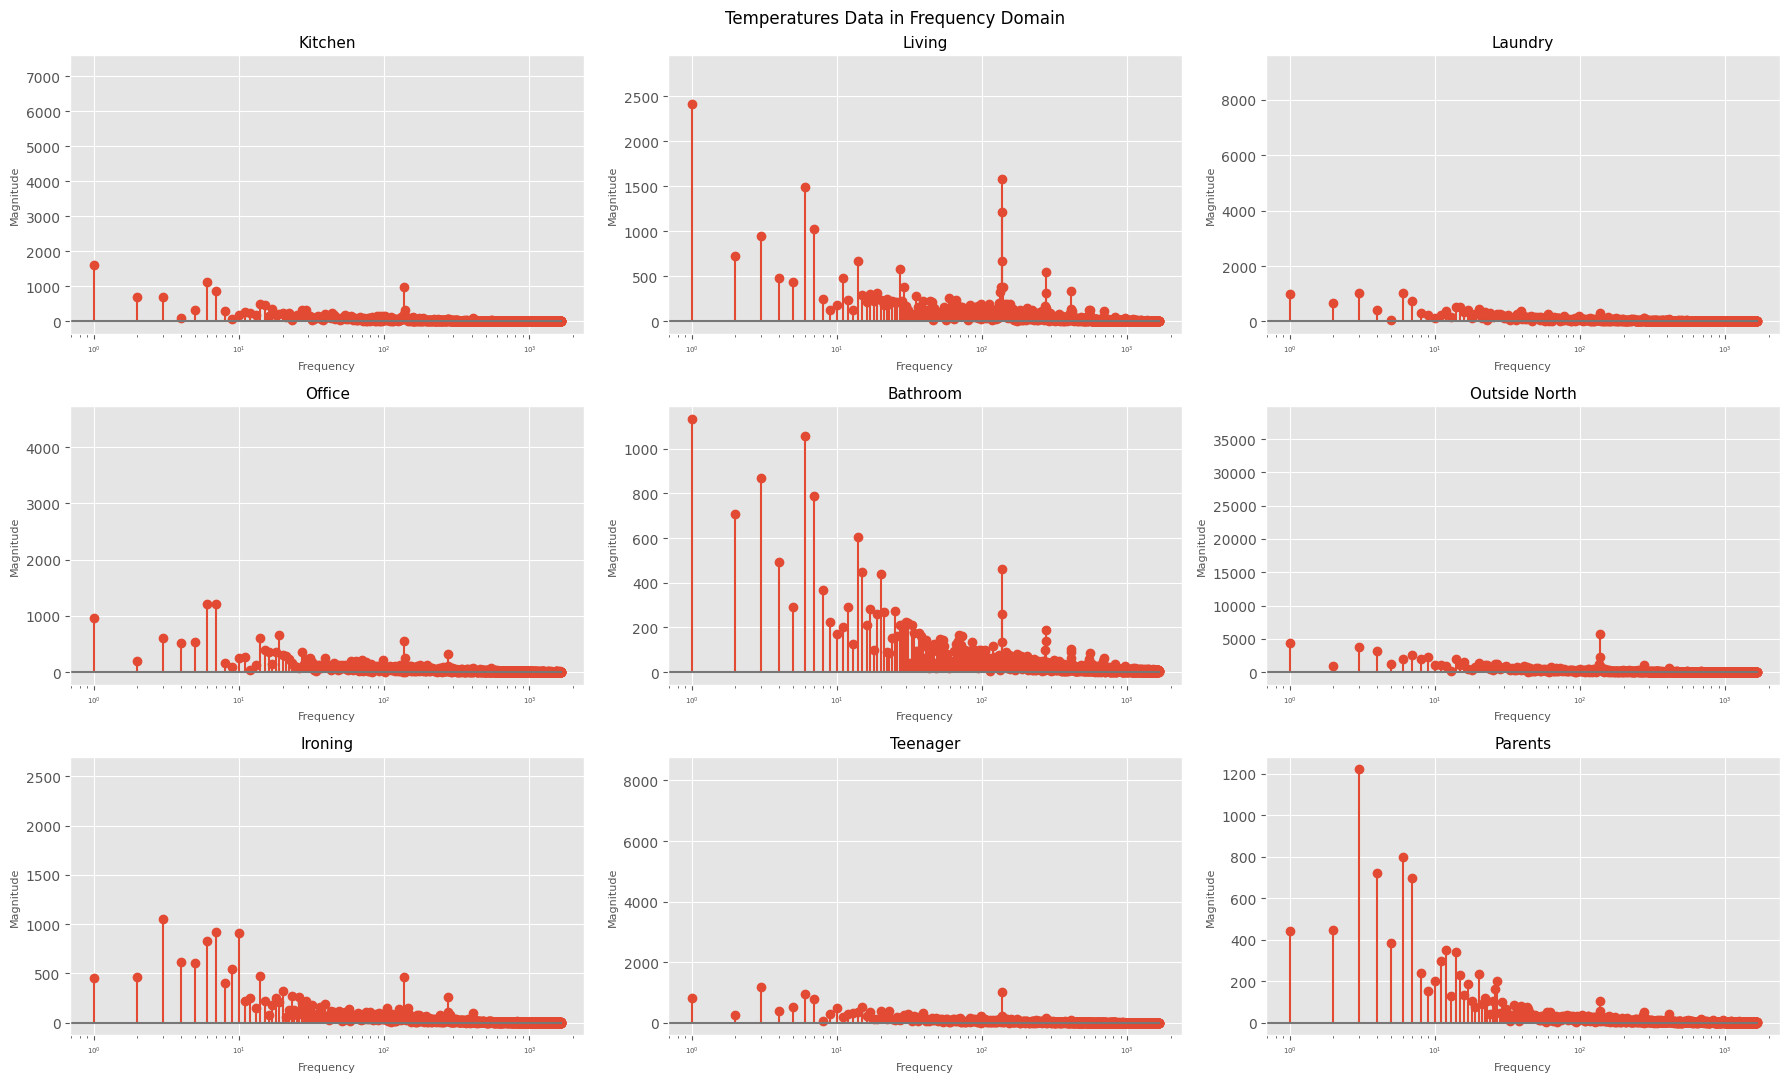

In [6]:
plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df_sub['T'+str(k)]
        num_samples = len(data.to_numpy())

        #dft
        fft = np.fft.rfft(data.to_numpy(), num_samples)

        axis[i,j].stem(abs(fft))
        #axis[i,j].plot(clean_data)

        axis[i,j].set_title(sensors[k], fontsize=11)
        axis[i,j].set_xlabel("Frequency", fontsize=8)
        axis[i,j].set_ylabel("Magnitude", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 
        axis[i,j].set_xscale('log')

figure.suptitle("Temperatures Data in Frequency Domain")
figure.tight_layout()
plt.show()


Making a zoom in the area of one day frequency in order to isolate it.

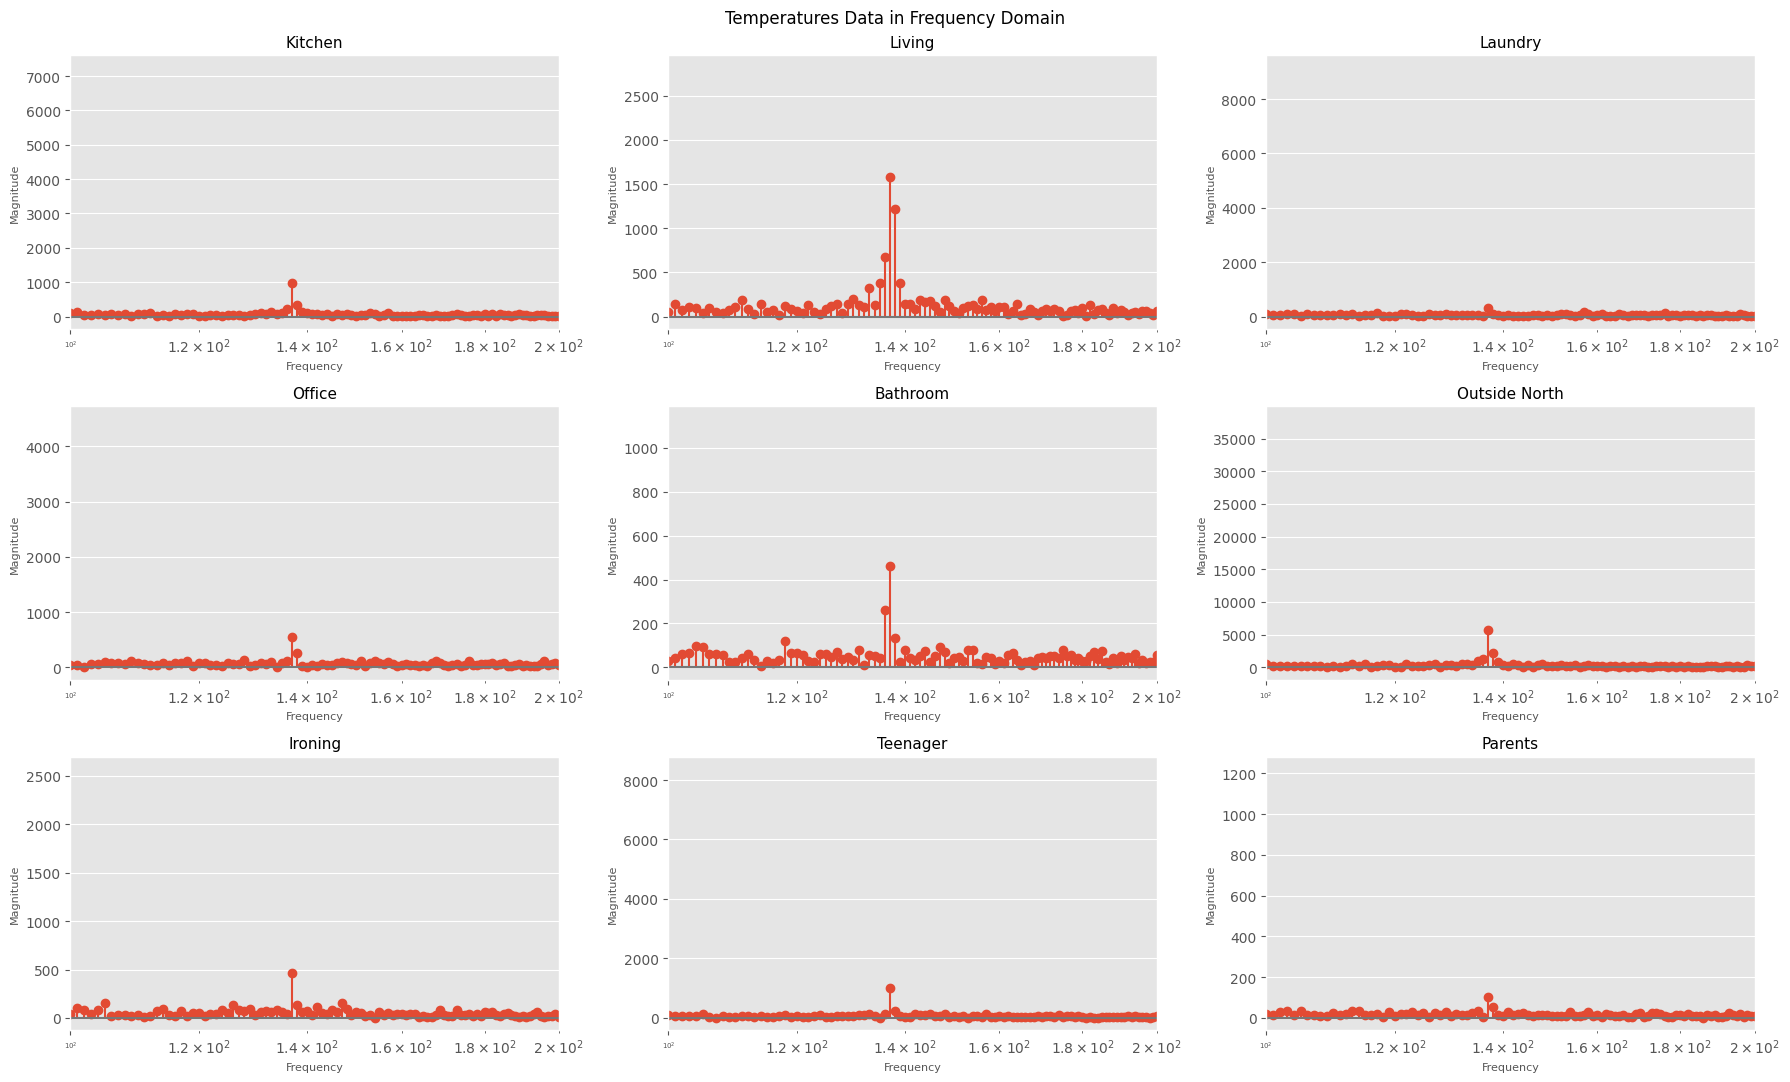

In [7]:
plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df_sub['T'+str(k)]
        num_samples = len(data.to_numpy())

        #dft
        fft = np.fft.rfft(data.to_numpy(), num_samples)

        axis[i,j].stem(abs(fft))
        #axis[i,j].plot(clean_data)
        axis[i,j].set_xlim(left=100, right=200)

        axis[i,j].set_title(sensors[k], fontsize=11)
        axis[i,j].set_xlabel("Frequency", fontsize=8)
        axis[i,j].set_ylabel("Magnitude", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 
        axis[i,j].set_xscale('log')


figure.suptitle("Temperatures Data in Frequency Domain")
figure.tight_layout()
plt.show()

High frequency have low response and are the ones which cause noise into data. The relevant signals are the ones with longer period. This means that our data are affected by noise caused by quick variation of temperatures. In order to clean data from noise and to isolate relevant signal (daily, weekly, monthly), high frequency signals can be deleted.

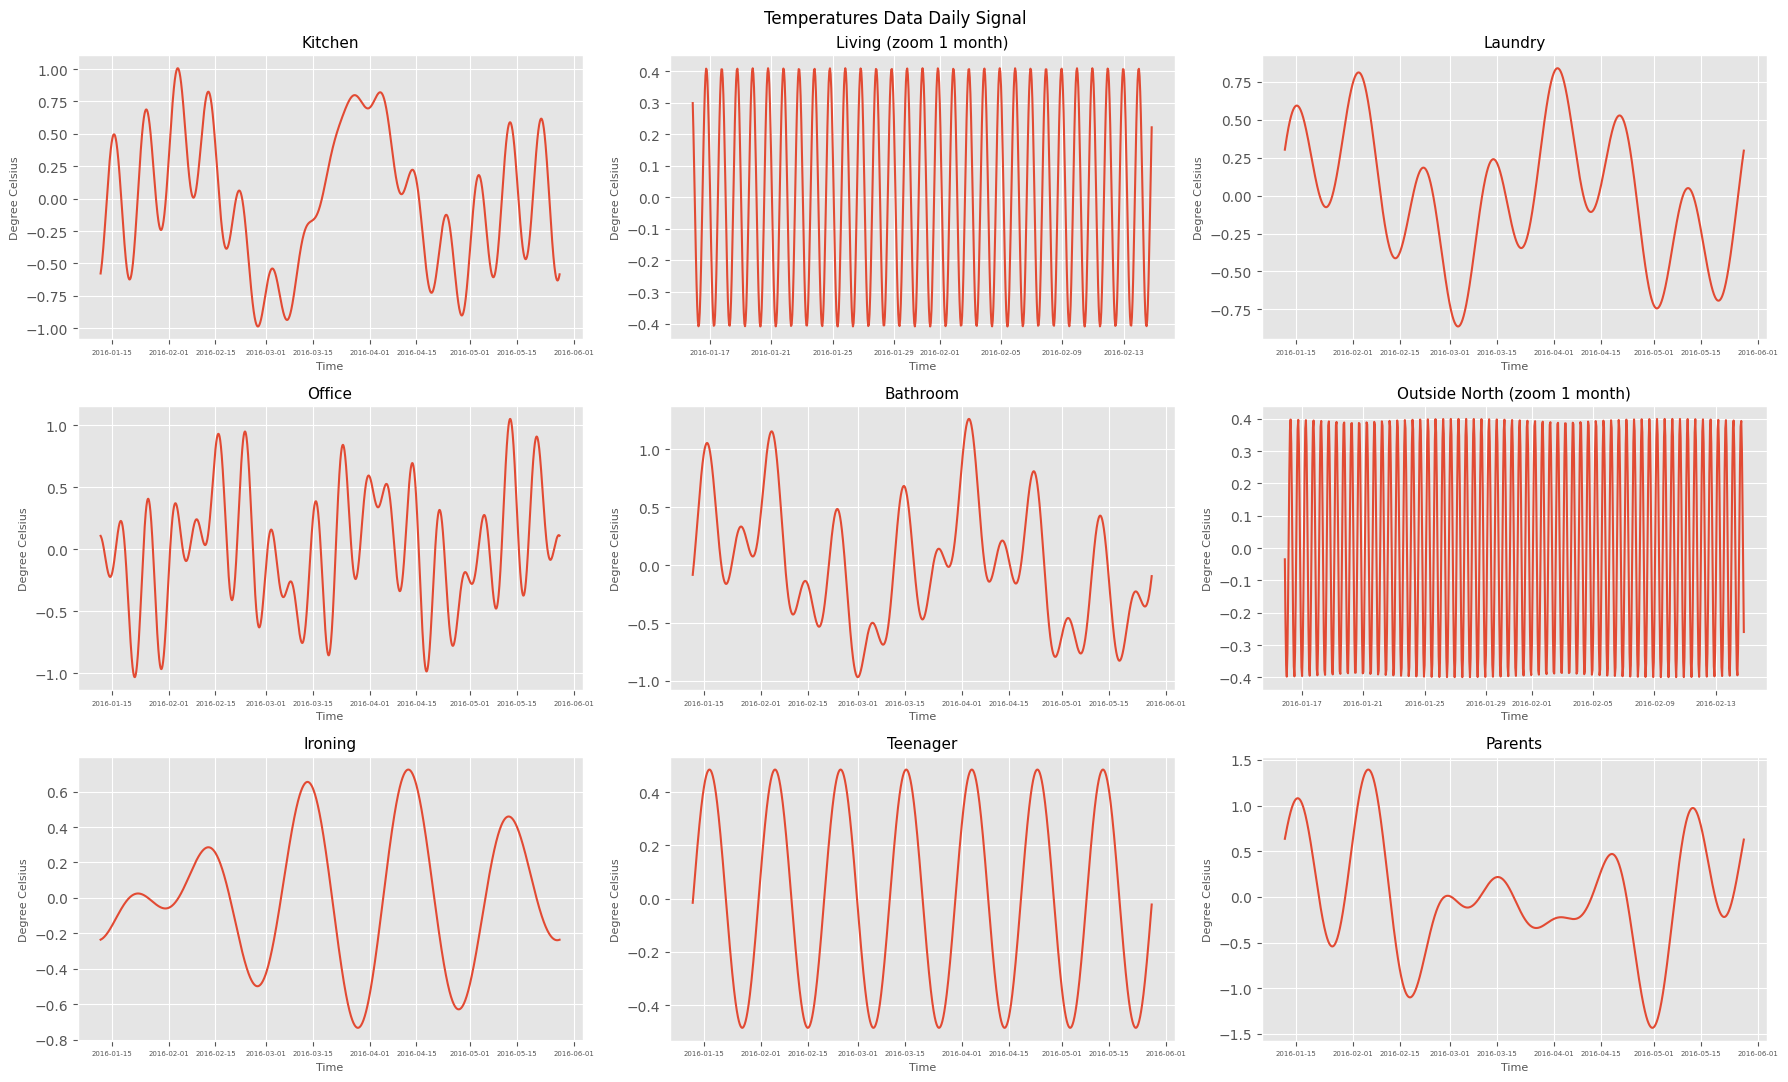

In [8]:
#daily signal 

plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
lim_sx = [50,136,100,100,100,130,100,100,50]
lim_dx = [160,138,200,200,200,140,200,200,200]

df_clean_daily = df_sub.copy(deep=True)

for i in range(3):
    for j in range(3):
        k+=1
        data = df_sub['T'+str(k)]
        num_samples = len(data.to_numpy())

        #dft
        fft = np.fft.rfft(data.to_numpy(), num_samples)

        PSD = fft * np.conj(fft) / num_samples

        _masklow = PSD > lim_sx[k-1]
        _maskhigh = PSD < lim_dx[k-1]
        fft = _maskhigh * fft
        fft = _masklow * fft 

        df_clean_daily['T'+str(k)]=np.fft.irfft(fft)

        #axis[i,j].stem(abs(fft[1:]))
        if k==6 or k==2: 
            axis[i,j].plot(df_clean_daily['T'+str(k)][100:820])
            axis[i,j].set_title(sensors[k]+" (zoom 1 month)", fontsize=11)
        else: 
            axis[i,j].plot(df_clean_daily['T'+str(k)])
            axis[i,j].set_title(sensors[k], fontsize=11)
        
        axis[i,j].set_xlabel("Time", fontsize=8)
        axis[i,j].set_ylabel("Degree Celsius", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 
        #axis[i,j].set_xscale('log')

figure.suptitle("Temperatures Data Daily Signal")
figure.tight_layout()
plt.show()

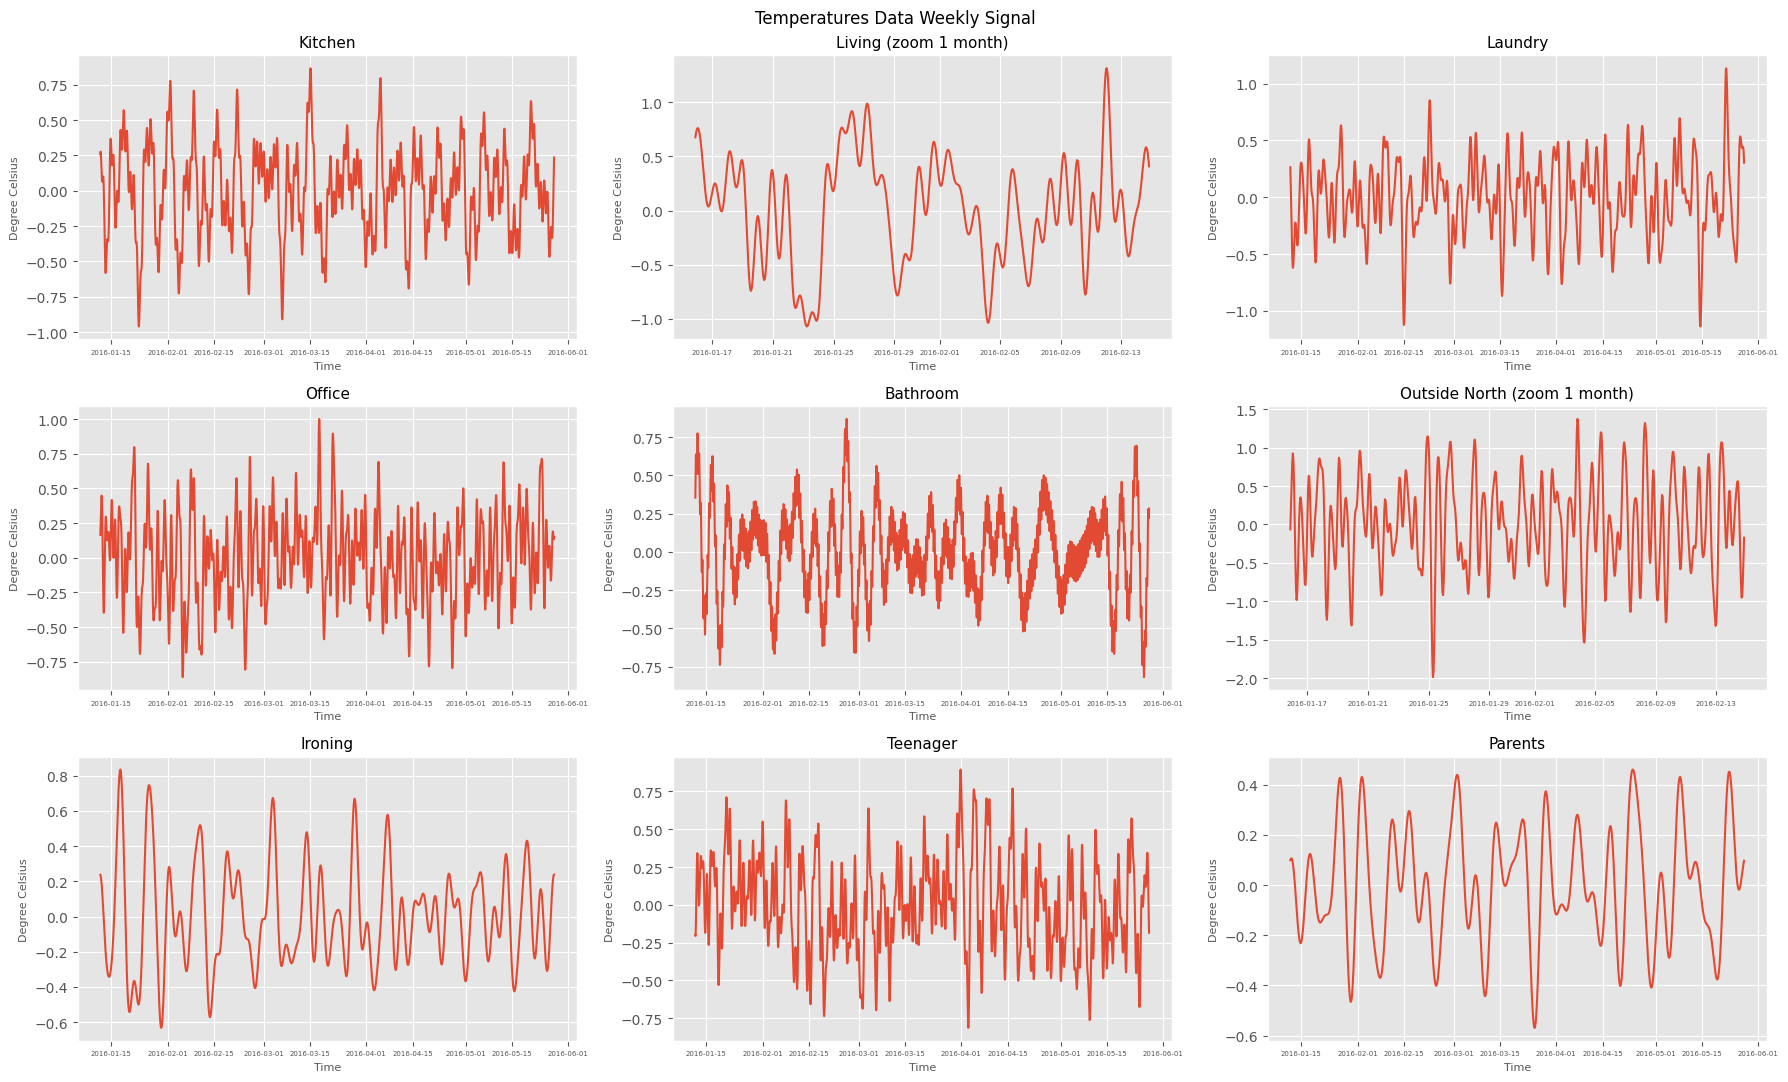

In [9]:
# weekly signal

plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
lim_sx = [10,10,10,10,10,10,10,10,10]
lim_dx = [20,20,20,20,20,20,20,20,20]

df_clean_weekly = df_sub.copy(deep=True)

for i in range(3):
    for j in range(3):
        k+=1
        data = df_sub['T'+str(k)]
        num_samples = len(data.to_numpy())

        #dft
        fft = np.fft.rfft(data.to_numpy(), num_samples)

        PSD = fft * np.conj(fft) / num_samples

        _masklow = PSD > lim_sx[k-1]
        _maskhigh = PSD < lim_dx[k-1]
        fft = _maskhigh * fft
        fft = _masklow * fft 

        df_clean_weekly['T'+str(k)]=np.fft.irfft(fft)

        #axis[i,j].stem(abs(fft[1:]))
        if k==6 or k==2: 
            axis[i,j].plot(df_clean_weekly['T'+str(k)][100:820])
            axis[i,j].set_title(sensors[k]+" (zoom 1 month)", fontsize=11)
        else: 
            axis[i,j].plot(df_clean_weekly['T'+str(k)])
            axis[i,j].set_title(sensors[k], fontsize=11)
        
        axis[i,j].set_xlabel("Time", fontsize=8)
        axis[i,j].set_ylabel("Degree Celsius", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 
        #axis[i,j].set_xscale('log')

figure.suptitle("Temperatures Data Weekly Signal")
figure.tight_layout()
plt.show()

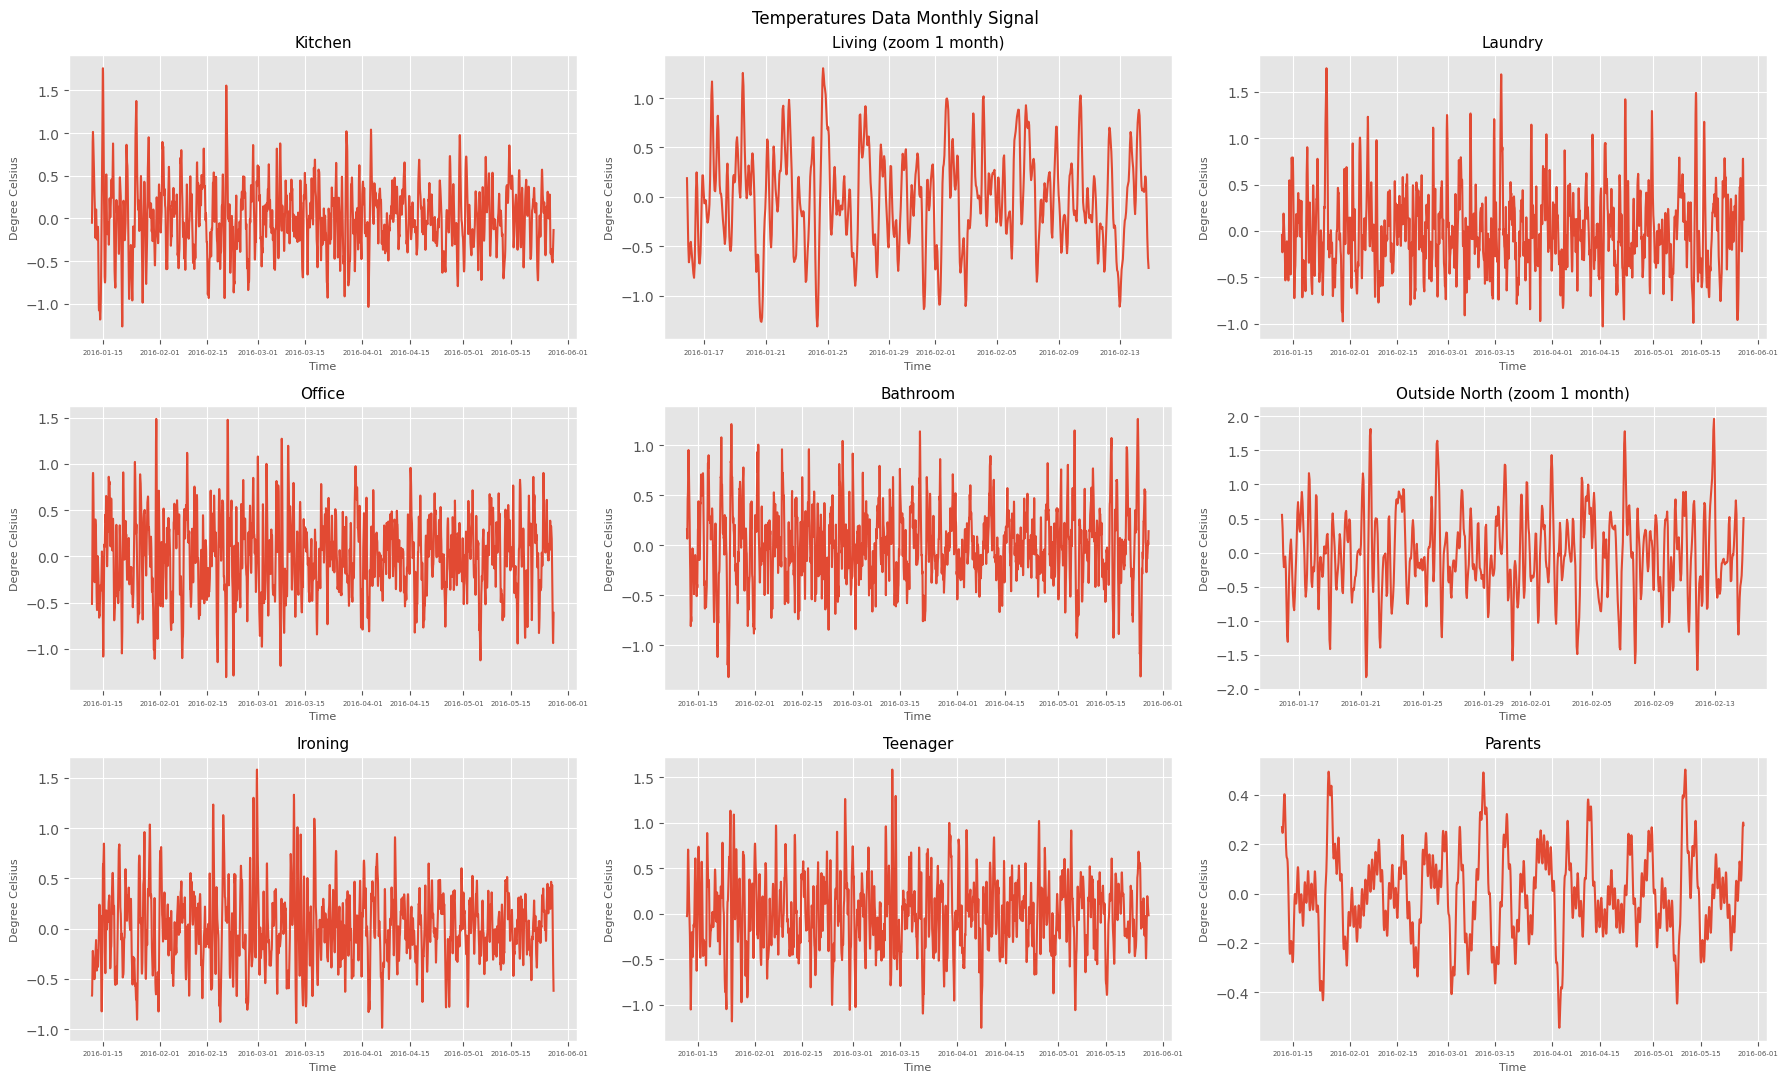

In [10]:
#monthly signal

plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(18, 11))

k=0
lim_sx = [1,1,1,1,1,1,1,1,1,1]
lim_dx = [8,8,8,8,8,8,8,8,8,8]

df_clean_monthly = df_sub.copy(deep=True)

for i in range(3):
    for j in range(3):
        k+=1
        data = df_sub['T'+str(k)]
        num_samples = len(data.to_numpy())

        #dft
        fft = np.fft.rfft(data.to_numpy(), num_samples)

        PSD = fft * np.conj(fft) / num_samples

        _masklow = PSD > lim_sx[k-1]
        _maskhigh = PSD < lim_dx[k-1]
        fft = _maskhigh * fft
        fft = _masklow * fft 

        df_clean_monthly['T'+str(k)]=np.fft.irfft(fft)

        #axis[i,j].stem(abs(fft[1:]))
        if k==6 or k==2: 
            axis[i,j].plot(df_clean_monthly['T'+str(k)][100:820])
            axis[i,j].set_title(sensors[k]+" (zoom 1 month)", fontsize=11)
        else: 
            axis[i,j].plot(df_clean_monthly['T'+str(k)])
            axis[i,j].set_title(sensors[k], fontsize=11)
        
        axis[i,j].set_xlabel("Time", fontsize=8)
        axis[i,j].set_ylabel("Degree Celsius", fontsize=8)
        axis[i,j].tick_params(axis="x", labelsize=5) 
        #axis[i,j].set_xscale('log')

figure.suptitle("Temperatures Data Monthly Signal")
figure.tight_layout()
plt.show()

After isolating the signals and plotting them back in the time domain, a daily periodicity can be identified, while it's not clear how temperatures cycle over months and weeks. Probably more data are needed to study periodicity over seasons instead of months.

## Auto-correlogram Analysis
Auto-correlation analysis can help to reveal repeating patterns like the daily periodic signals which this time series seems to have.

After cleaning data of time series, their auto-correlogram can be studied. From time series of temperatures it's reasonable to expect the value to repeat every day, high temperature by day and low by night.

First auto-correlation of the daily signal with a lag of 1 day is plotted. After subsampling data have 1 hour interval, so a lag of 1 day need a k equal 24.

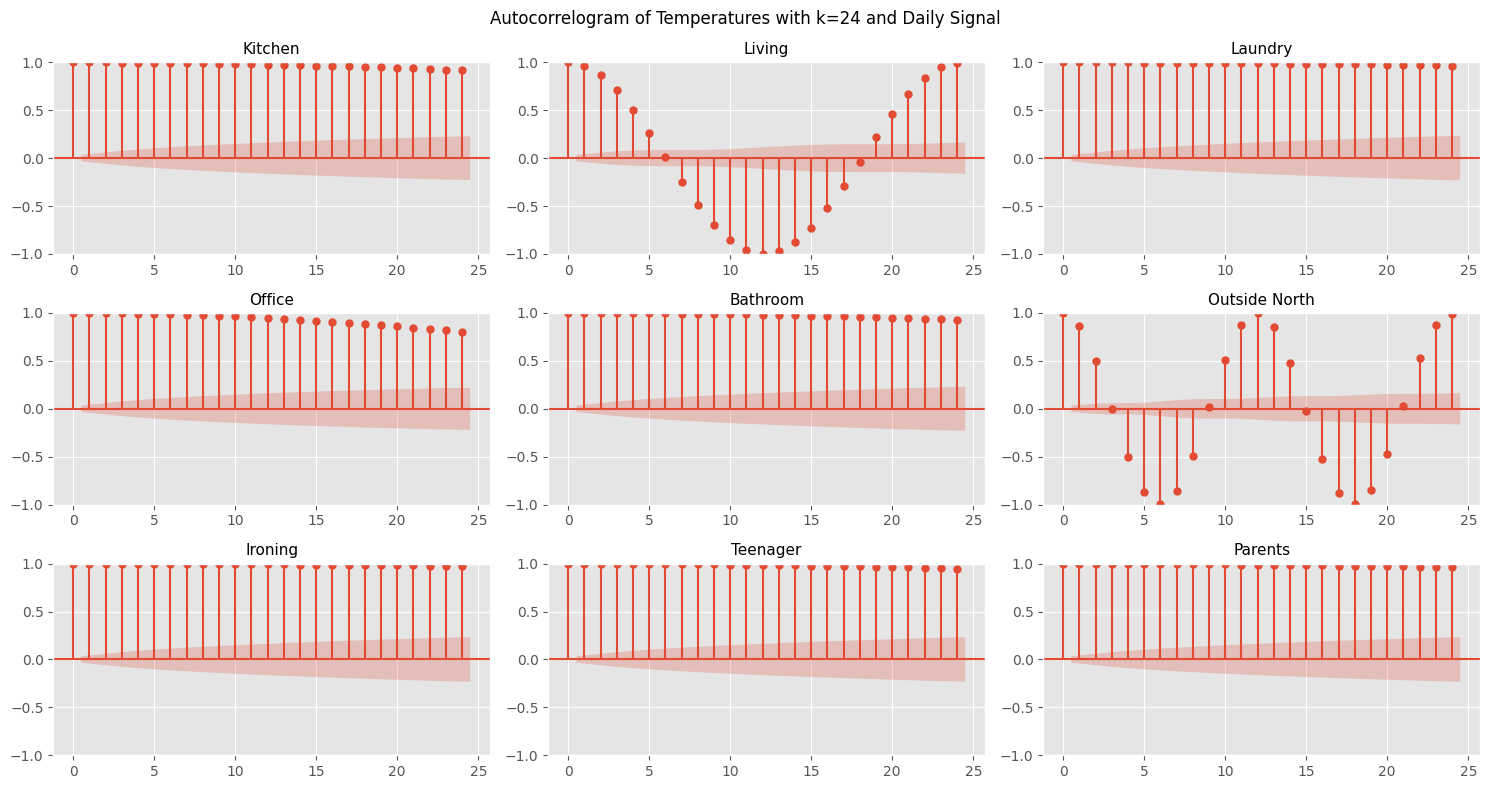

In [11]:
plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(15, 8))

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df_clean_daily['T'+str(k)].to_numpy()
        tsaplots.plot_acf(data, lags = 24, ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Autocorrelogram of Temperatures with k=24 and Daily Signal")
figure.tight_layout()
plt.show()


Then daily with a lag of 7 day.

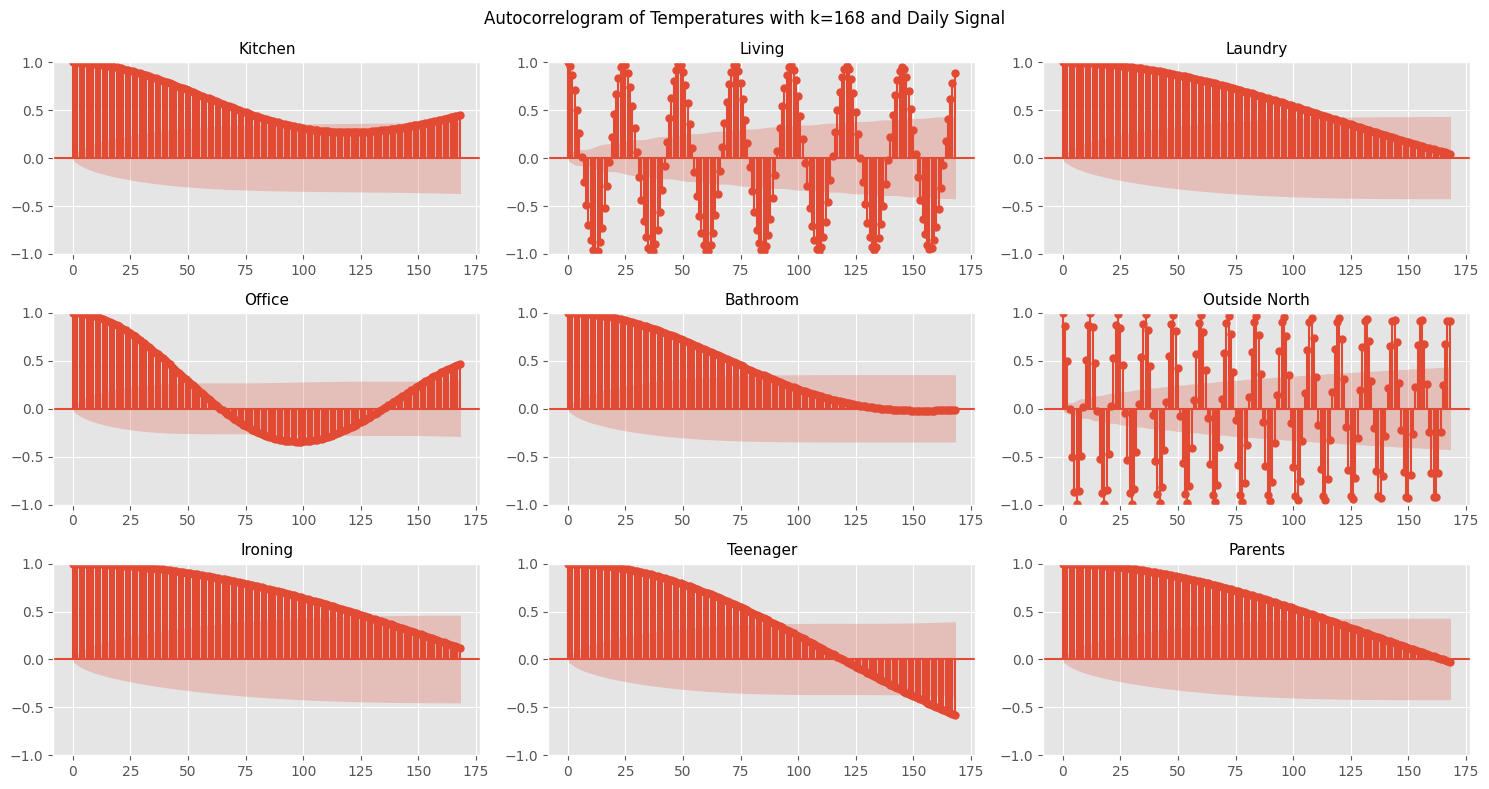

In [12]:
plt.style.use("ggplot")
figure, axis = plt.subplots(3, 3, figsize=(15, 8))

k=0
for i in range(3):
    for j in range(3):
        k+=1
        data = df_clean_daily['T'+str(k)].to_numpy()
        # now we have 1 hour interval
        tsaplots.plot_acf(data, lags = 168, ax=axis[i,j])
        axis[i,j].set_title(sensors[k], fontsize=11)

figure.suptitle("Autocorrelogram of Temperatures with k=168 and Daily Signal")
figure.tight_layout()
plt.show()

Autocorrelogram of the sensors indoor show a stable correlation of 1, while the outdoor sensor (Outside North) has a sine wave. As one can expect temperatures inside the house are quite stable in a daily basis, instead outside the values increase and decrease regularly. Living room also has a sine wave with respect to the other indoor sensors, this could be caused by the position of the room in the house and by the distribution of heating. With higher lag the auto-correlation decrease and go in an interval of non relevance, the correlation of temperatures more and more distant is lower.

## Final Considerations
The goal of the assignment was to plot and make observation on temperatures auto-correlogram of the given dataset. 

Data of the time series was quite noisy so before to study their peroiodicity a preprocessing was necessary. First to remove noise subsampling and trend remove was performed. Then DFT analysis was used to identify daily periodicity signal and to reduce more the noise. Finally the 9 auto-correlogram show different behaviour of indoor and outdoor temperatures on a daily periodicity, with the anomaly of Living Room. 

This assignment gave me the possibility to apply the knowledge obtained during lectures into the analysis of time series, which is one of my favourite topic. It also gave me the possibility to use Discrete Fourier Transfomr, wich was a new topic to me that i wanted to explore. To perform the analysis i used standard scientific and data manipulation library such as pandas, scikitlearn, numpy and matplotlib.

Further analysis can be developed on the lower frequency to study weekly and monthly periodicity but it's not guaranteed to find relevant information without knowledge on the behaviour of the house owners. It would be interesting to integrate in the analysis the humidity sensors to study their correlation.